In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

f_in = 'C://Users//aeroplan//Desktop//svm_sample_z.out'

l_x = list()
with open(f_in,'r') as file:    
    for line in file:
        #z = line.split(',')#,2)
        z = np.fromstring(line, dtype=float, sep='\t') 
        l_x.append(z)
        #df =None
file.close()

l_p = PCA(n_components=2).fit_transform(l_x)
l_z = pd.DataFrame(data = l_p)
print(l_z)


In [1]:
import matplotlib.pylab as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

          x1        x2    y   i
0   0.919104  1.538203 -0.5   1
1   0.156490 -1.847328  0.5   2
2  -0.693857 -0.322506 -0.5   3
3  -1.299496  0.428108  0.5   4
4   2.127870  0.540847  0.5   5
5   0.144152  1.848029 -0.5   6
6  -1.156686 -1.373023 -0.5   7
7   2.688015 -0.754948  0.5   8
8   0.065694  1.649971  0.5   9
9  -1.801178  1.506662 -0.5  10
10 -2.121640  2.448245  0.5  11
11 -0.279713 -1.491037 -0.5  12
12  0.620770 -0.865789  0.5  13
13 -1.491542  1.129322 -0.5  14
14  1.006343  1.008692  0.5  15
15  0.560763 -1.620492 -0.5  16
16  2.289018  0.009958  0.5  17
17 -1.123211 -0.556862 -0.5  18
18  1.177395 -1.303708 -0.5  19
19 -0.771010 -1.467632  0.5  20
20  1.216906  0.718591  0.5  21
21  0.896181 -1.894447 -0.5  22
22 -1.835823  1.934467 -0.5  23
23  1.337425  1.001039  0.5  24
24 -1.374733 -1.400488 -0.5  25
25 -0.412510 -0.665309  0.5  26
26  1.948392  1.534686  0.5  27
27  1.200659  0.375742 -0.5  28
28  1.450443  0.964013  0.5  29
29  3.221783  0.903897 -0.5  30
30 -1.40

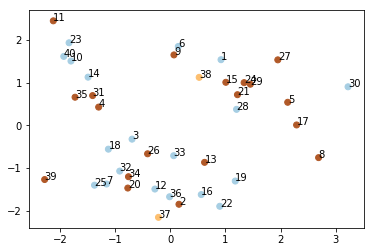

[-0.76261400000000001, 0.60563900000000004, 1.9837180000000001, -3.8447010000000001, 1.8668719999999999, 1.8419270000000001, 2.1123119999999997, -0.44557999999999998, 3.412229, 1.9484050000000002, 0.32072500000000015, -3.1732480000000001, 0.96222299999999994, -0.74773299999999998, -1.7713400000000004, 0.49145899999999998, -0.81977999999999995, 1.7145010000000001, -0.34652200000000022]
[-3.3855309999999998, -0.750614, -1.3071820000000001, -0.61807499999999993, 0.14330899999999969, -3.9392820000000004, -1.9951109999999999, -2.629184, 0.56681999999999999, 0.16392399999999996, 2.6130380000000004, 0.9334279999999997, 0.73517899999999992, -1.158944, 0.060115999999999947, -1.7676609999999999, -0.49218599999999979, -2.330997, -2.8834949999999999]
[1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0]


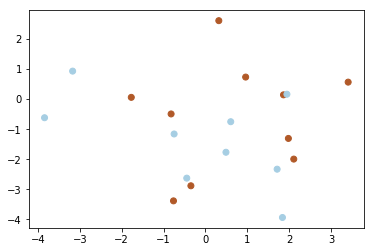

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.svm import SVC, NuSVC
from matplotlib.colors import ListedColormap

f_in = 'C://Users//aeroplan//Desktop//svm_pca.out'
df = pd.read_csv(f_in, header=None, sep= '\t', names =['x1','x2', 'y', 'i'])
print(df)
#plt.scatter(df.x1, df.x2)

fig, ax = plt.subplots()
ax.scatter(df.x1, df.x2, c=df.y, cmap=plt.cm.Paired)

for i, txt in enumerate(df.i):
    ax.annotate(txt, (df.x1[i],df.x2[i]))
    
plt.show()



i = 0
k = 0
x1_diff, x2_diff, y_diff = [],[],[]
while( i <len(df.y)-1):
    if df.y[i] == df.y[i+1]:
        i +=2
        continue
    
    x1_diff.append(df.x1[i]-df.x1[i+1])
    x2_diff.append(df.x2[i]-df.x2[i+1])
    y_diff.append(np.sign(df.y[i]-df.y[i+1]))
   
    if(y_diff[-1] != (-1)**k):
        y_diff[-1] *= -1
        x1_diff[-1] *= -1
        x2_diff[-1] *= -1
            
    i +=2
    k+=1

print(x1_diff)
print(x2_diff)
print(y_diff)

fig, ax = plt.subplots()
ax.scatter(x1_diff, x2_diff, c=y_diff, cmap=plt.cm.Paired)
plt.show()

x_diff = list()
for i in range(len(x1_diff)):
    x_diff.append([x1_diff[i], x2_diff[i]])
    
x_diff = np.reshape(x_diff, (19,2))

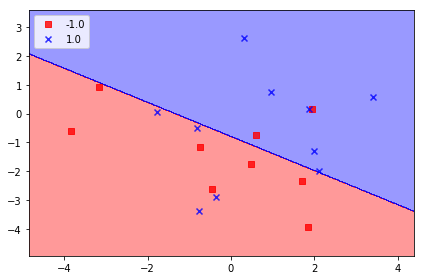

svm.decisoin_function
[ 1.13664626]
[ 0.04297547]

svm coefficient
[[ 0.28196516  0.47634411]]

matrix multiplication with svm.coef_
[ 0.75830927]
[-0.33536153]


In [23]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear')
# Train the classifier
svm.fit(x_diff, y_diff)

# Visualize the decision boundaries
plot_decision_regions(x_diff, y_diff, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print('svm.decisoin_function')
print(svm.decision_function([[1,1]]))
print(svm.decision_function([[0.5,-1]]))
print()

print('svm coefficient')
print(svm.coef_)
print()

print('matrix multiplication with svm.coef_')
print(np.matmul(svm.coef_, [1,1]))
print(np.matmul(svm.coef_, [0.5,-1]))



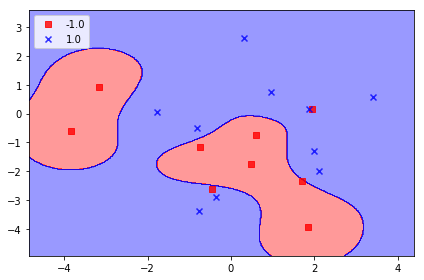

svm.score
input [[1,1]], [1] : 1.0
input [[1,1]], [-1] : 0.0
input [[0.5,-1]],[1] : 0.0
input [[0.5,-1]],[-1] : 1.0

svm.decisoin_function
input [[1,1]] : [ 0.99980726]
input [[0.5,-1]] : [-1.08890852]

svm coefficient


AttributeError: coef_ is only available when using a linear kernel

In [28]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Create a SVC classifier using an RBF kernel
svm_rbf = SVC(kernel='rbf', gamma=1)
# Train the classifier
svm_rbf.fit(x_diff, y_diff)

# Visualize the decision boundaries
plot_decision_regions(x_diff, y_diff, classifier=svm_rbf)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'''
Returns the mean accuracy on the given test data and labels.
'''

print('svm.score')
print('input [[1,1]], [1] : '+str(svm_rbf.score([[1,1]], [1])))
print('input [[1,1]], [-1] : '+str(svm_rbf.score([[1,1]], [-1])))

print('input [[0.5,-1]],[1] : '+str(svm_rbf.score([[0.5,-1]], [1])))
print('input [[0.5,-1]],[-1] : '+str(svm_rbf.score([[0.5,-1]], [-1])))

'''
Distance of the samples X to the separating hyperplane.
'''
print()
print('svm.decisoin_function')
print('input [[1,1]] : '+str(svm_rbf.decision_function([[1,1]])))
print('input [[0.5,-1]] : '+str(svm_rbf.decision_function([[0.5,-1]])))

'''
coef_ : array, shape = [n_class-1, n_features]

    Weights assigned to the features (coefficients in the primal problem). This is only available in the case of a linear kernel.

    coef_ is a readonly property derived from dual_coef_ and support_vectors_.
'''
print()
print('svm coefficient')
print(svm_rbf.coef_)

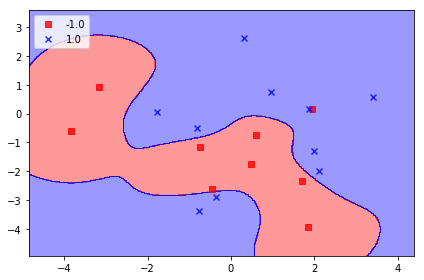

svm.score
input [[1,1]], [1] : 1.0
input [[1,1]], [-1] : 0.0

svm.decisoin_function
input [[1,1]]: [ 0.97137499]
input [[0.5,-1]]: [-1.19620583]

svm coefficient


AttributeError: coef_ is only available when using a linear kernel

In [27]:
# http://scikit-learn.org/stable/modules/svm.html#svm-classification
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC

# Create a SVC classifier using an RBF kernel
nu_svm = NuSVC(kernel='rbf', gamma=1)
# Train the classifier
nu_svm.fit(x_diff, y_diff)

# Visualize the decision boundaries
plot_decision_regions(x_diff, y_diff, classifier=nu_svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

'''
Returns the mean accuracy on the given test data and labels.
'''

print('svm.score')
print('input [[1,1]], [1] : '+str((nu_svm.score([[1,1]], [1]))))
print('input [[1,1]], [-1] : '+str(nu_svm.score([[1,1]], [-1])))

'''
Distance of the samples X to the separating hyperplane.
'''
print()
print('svm.decisoin_function')
print('input [[1,1]]: '+str(nu_svm.decision_function([[1,1]])))
print('input [[0.5,-1]]: '+str(nu_svm.decision_function([[0.5,-1]])))

'''
coef_ : array, shape = [n_class-1, n_features]

    Weights assigned to the features (coefficients in the primal problem). This is only available in the case of a linear kernel.

    coef_ is readonly property derived from dual_coef_ and support_vectors_.

'''
print()
print('svm coefficient')
print(nu_svm.coef_)